# 特征工程

对于特征进行进一步分析，并对于数据进行处理
常见特征工程：
    * 异常值处理
    * 特征归一化/标准化
    * 数据分桶
    * 缺失值处理
    * 特征构造
    * 特征筛选
    * 降维

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter
from sklearn import preprocessing
%matplotlib inline

In [2]:
## 通过Pandas对于数据进行读取 (pandas是一个很友好的数据读取函数库)
Train_data = pd.read_csv('train.csv', sep=',')
Test_data = pd.read_csv('test.csv', sep=',')
## 输出数据的大小信息
print('Train data shape:',Train_data.shape)
print('TestA data shape:',Test_data.shape)

Train data shape: (4048, 66)
TestA data shape: (1737, 66)


In [3]:
Train_data.head()

,positiveculture_poe,age,is_male,race_black,race_white,race_hispanic,race_other,height,weight,aniongap_min,...,resprate_max,resprate_mean,tempc_min,tempc_max,tempc_mean,spo2_min,spo2_max,spo2_mean,glucose_mean,icu_los
0,0,45.7505,1,0,0,0,1,178.00,250.0,11,...,29,24.347826,37.666667,38.555556,38.101852,92,96,94.695652,196.7,2.0142
1,0,83.6432,0,0,1,0,0,160.00,58.1,15,...,33,21.135135,36.055556,36.500000,36.314815,96,100,98.558824,90.0,2.0708
2,0,64.3080,1,0,1,0,0,177.80,95.1,8,...,40,24.212121,36.222222,37.444444,37.027778,90,99,94.310345,170.0,4.2641
3,1,56.5050,1,0,1,0,0,182.88,113.4,14,...,23,16.954545,37.277778,37.388889,37.333333,91,100,95.454545,135.5,0.9250
4,1,69.3102,0,0,1,0,0,165.10,101.0,13,...,25,20.700000,36.611111,38.111111,37.475309,95,100,98.974359,134.0,8.2287


In [4]:
Train_data.columns

Index(['positiveculture_poe', 'age', 'is_male', 'race_black', 'race_white',
       'race_hispanic', 'race_other', 'height', 'weight', 'aniongap_min',
       'aniongap_max', 'bicarbonate_min', 'bicarbonate_max', 'bilirubin_min',
       'bilirubin_max', 'creatinine_min', 'creatinine_max', 'chloride_min',
       'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min',
       'hematocrit_max', 'hemoglobin_min', 'hemoglobin_max', 'lactate_min',
       'lactate_max', 'platelet_min', 'platelet_max', 'potassium_min',
       'potassium_max', 'ptt_min', 'ptt_max', 'inr_min', 'inr_max', 'pt_min',
       'pt_max', 'sodium_min', 'sodium_max', 'bun_min', 'bun_max', 'wbc_min',
       'wbc_max', 'heartrate_min', 'heartrate_max', 'heartrate_mean',
       'sysbp_min', 'sysbp_max', 'sysbp_mean', 'diasbp_min', 'diasbp_max',
       'diasbp_mean', 'meanbp_min', 'meanbp_max', 'meanbp_mean',
       'resprate_min', 'resprate_max', 'resprate_mean', 'tempc_min',
       'tempc_max', 'tempc_mean', 'spo2_min

## 删除异常值

In [5]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
# 感谢阿泽大佬
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 21
Now column number is: 4027
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: weight, dtype: float64
Description of data larger than the upper bound is:
count     21.000000
mean     249.160952
std      127.391721
min      179.000000
25%      190.000000
50%      204.120000
75%      232.700000
max      670.000000
Name: weight, dtype: float64


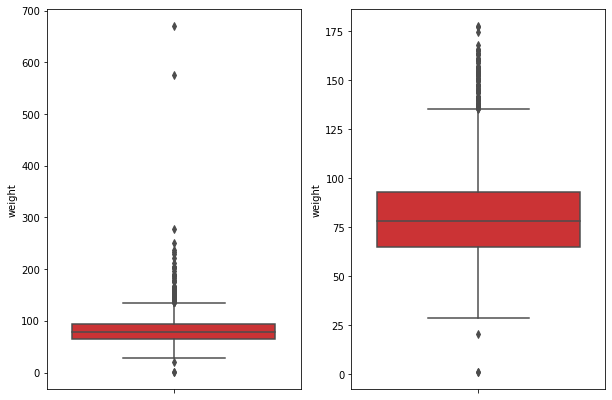

In [6]:
# 删掉一些异常数据，以 weighyt为例,人体的体重不可能最小为1，医学上根据常识可以判断一些常见指标是否为异常。
# 但是，医学中，尤其是ICU中，患者的病理生理会有很大的不同，不能随意的处理异常值
# 临床患者中，极端情况是有的，数据中出现这里数据处理一定要结合临床。
# weight,meanbp_min
Train_data = outliers_proc(Train_data, 'weight', scale=3)

Delete number is: 28
Now column number is: 3999
Description of data less than the lower bound is:
count    28.0000
mean      2.0000
std       0.7698
min       1.0000
25%       1.0000
50%       2.0000
75%       3.0000
max       3.0000
Name: meanbp_min, dtype: float64
Description of data larger than the upper bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: meanbp_min, dtype: float64


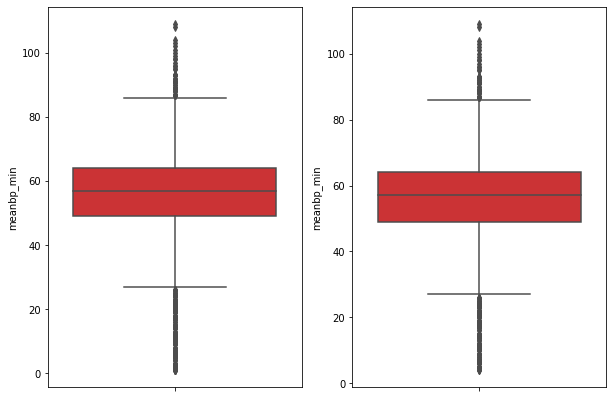

In [7]:
# meanbp_min
Train_data = outliers_proc(Train_data, 'meanbp_min', scale=3)

### 直播讲解了一些其他方法：（以后再尝试、及补充）
* 3δ原则
* Z-score
* DBSCAN
* 孤立森林|Isolation Forest
处理方法：用平均值来修正，删除含有异常值的记录，将异常值视为缺失值，待合并处理缺失值的方法一起处理

## 特征构造

In [8]:
# 训练集和测试集放在一起，方便构造特征
Train_data['train']=1
Test_data['train']=0
data = pd.concat([Train_data, Test_data], ignore_index=True)

* 医学中处理时间序列也是比较常见，第一天做的检查，第二天做的检查，都可以作为时间标签,以及上午或者下午的体温，尿量
* 心电、脑电都是有时间戳
* 出院时间点减去入院时间点就是住院时间。
* 死亡时间减去住院时间得到时长的可以成为院后生存时间，对于ICU比较有意义的是28天生存率，90天生存率。肿瘤就是3年、5年的生存情况。


*  删除缺失数据占总样本量过大，7.5%，那么可以保留不去删除,可以先放着，因为如果我们 XGBoost 之类的决策树，其本身就能处理缺失值，所以可以不用管；
* 这里我自己的数据已经用R填补了缺失值，因为准备用LSTM网络建模，所有的缺失值都填补了，但是当时没有学习这些，还是见的太少。

看到先验只是有些疑问：
* 不知道一些医学上的根据实验检查而得到的量表结果（也是经过某些运算得到的，根据结果打分，统计最后得分）算不算先验知识
* 自我感觉量表应该是可以降维用

In [9]:
'''
# 计算某品牌的销售统计量，同学们还可以计算其他特征的统计量
# 这里要以 train 的数据计算统计量
Train_gb = Train_data.groupby("brand")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['price'] > 0]
    info['brand_amount'] = len(kind_data)
    info['brand_price_max'] = kind_data.price.max()
    info['brand_price_median'] = kind_data.price.median()
    info['brand_price_min'] = kind_data.price.min()
    info['brand_price_sum'] = kind_data.price.sum()
    info['brand_price_std'] = kind_data.price.std()
    info['brand_price_average'] = round(kind_data.price.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})
data = data.merge(brand_fe, how='left', on='brand')
'''
#  阿泽老师的这一段代码如果在分析亚组中可以修改而得到其他特征的统计量
# 尝试根据性别来分亚组统计其他特征
Train_gb = Train_data.groupby("is_male")
all_info = {}
for kind, kind_data in Train_gb:
    info = {}
    kind_data = kind_data[kind_data['icu_los'] > 0]
    info['is_male_amount'] = len(kind_data)
    info['is_male_icu_los_max'] = kind_data.icu_los.max()
    info['is_male_icu_los_median'] = kind_data.icu_los.median()
    info['is_male_icu_los_min'] = kind_data.icu_los.min()
    info['is_male_icu_los_sum'] = kind_data.icu_los.sum()
    info['is_male_icu_los_std'] = kind_data.icu_los.std()
    info['is_male_icu_los_average'] = round(kind_data.icu_los.sum() / (len(kind_data) + 1), 2)
    all_info[kind] = info
brand_fe = pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "is_male"})
data = data.merge(brand_fe, how='left', on='is_male')





In [10]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

#大佬说年龄可以分桶，那我这里就以年龄来举例
bin = [i*10 for i in range(90)]
data['age_bin'] = pd.cut(data['age'], bin, labels=False)
data[['age_bin', 'age']].head().append(data[['age_bin', 'age']].tail())

,age_bin,age
0,8,83.6432
1,6,64.3080
2,5,56.5050
3,6,69.3102
4,8,86.2825
5731,7,72.3904
5732,5,57.6494
5733,2,22.9327
5734,7,75.9332
5735,8,86.9560


In [11]:
print(data.shape)
data.columns

(5736, 75)


Index(['positiveculture_poe', 'age', 'is_male', 'race_black', 'race_white',
       'race_hispanic', 'race_other', 'height', 'weight', 'aniongap_min',
       'aniongap_max', 'bicarbonate_min', 'bicarbonate_max', 'bilirubin_min',
       'bilirubin_max', 'creatinine_min', 'creatinine_max', 'chloride_min',
       'chloride_max', 'glucose_min', 'glucose_max', 'hematocrit_min',
       'hematocrit_max', 'hemoglobin_min', 'hemoglobin_max', 'lactate_min',
       'lactate_max', 'platelet_min', 'platelet_max', 'potassium_min',
       'potassium_max', 'ptt_min', 'ptt_max', 'inr_min', 'inr_max', 'pt_min',
       'pt_max', 'sodium_min', 'sodium_max', 'bun_min', 'bun_max', 'wbc_min',
       'wbc_max', 'heartrate_min', 'heartrate_max', 'heartrate_mean',
       'sysbp_min', 'sysbp_max', 'sysbp_mean', 'diasbp_min', 'diasbp_max',
       'diasbp_mean', 'meanbp_min', 'meanbp_max', 'meanbp_mean',
       'resprate_min', 'resprate_max', 'resprate_mean', 'tempc_min',
       'tempc_max', 'tempc_mean', 'spo2_min

In [12]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出一下
data.to_csv('patients_for_tree.csv', index=0)

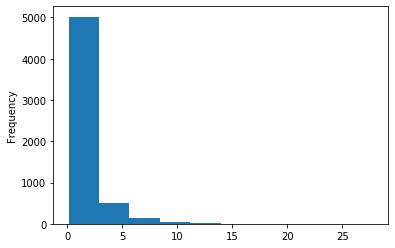

In [13]:
# 我们可以再构造一份特征给 LR NN 之类的模型用
# 之所以分开构造是因为，不同模型对数据集的要求不同
# 我们看下数据分布：(随意取得，ICU中肌酐常常会偏高)
data['creatinine_max'].plot.hist()

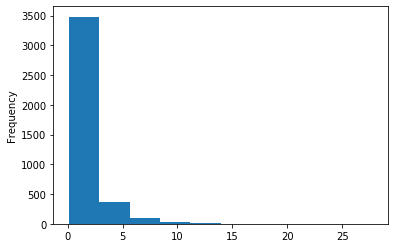

In [14]:
Train_data['creatinine_max'].plot.hist()

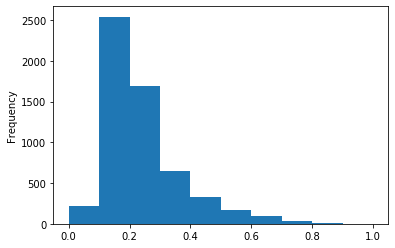

In [15]:
# 我们对其取 log，在做归一化
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
data['creatinine_max'] = np.log(data['creatinine_max'] + 1) 
data['creatinine_max'] = ((data['creatinine_max'] - np.min(data['creatinine_max'])) / (np.max(data['creatinine_max']) - np.min(data['creatinine_max'])))
data['creatinine_max'].plot.hist()

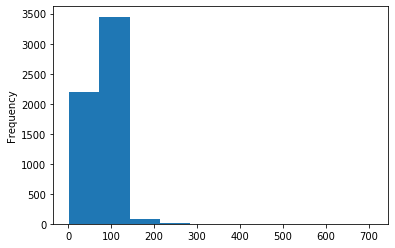

In [16]:
data['weight'].plot.hist()

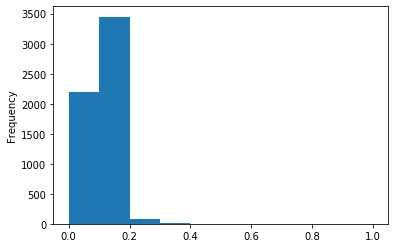

In [17]:
# 直接做归一化
data['weight'] = ((data['weight'] - np.min(data['weight'])) / 
                        (np.max(data['weight']) - np.min(data['weight'])))
data['weight'].plot.hist()

In [19]:
# 这里不再一一举例分析了，直接做变换，
def max_min(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

data['is_male_amount'] = ((data['is_male_amount'] - np.min(data['is_male_amount'])) / 
                        (np.max(data['is_male_amount']) - np.min(data['is_male_amount'])))
data['is_male_icu_los_max'] = ((data['is_male_icu_los_max'] - np.min(data['is_male_icu_los_max'])) / 
                               (np.max(data['is_male_icu_los_max']) - np.min(data['is_male_icu_los_max'])))
data['is_male_icu_los_average'] = ((data['is_male_icu_los_average'] - np.min(data['is_male_icu_los_average'])) / 
                           (np.max(data['is_male_icu_los_average']) - np.min(data['is_male_icu_los_average'])))
data['is_male_icu_los_median'] = ((data['is_male_icu_los_median'] - np.min(data['is_male_icu_los_median'])) /
                              (np.max(data['is_male_icu_los_median']) - np.min(data['is_male_icu_los_median'])))
data['is_male_icu_los_min'] = ((data['is_male_icu_los_min'] - np.min(data['is_male_icu_los_min'])) / 
                           (np.max(data['is_male_icu_los_min']) - np.min(data['is_male_icu_los_min'])))
data['is_male_icu_los_std'] = ((data['is_male_icu_los_std'] - np.min(data['is_male_icu_los_std'])) / 
                           (np.max(data['is_male_icu_los_std']) - np.min(data['is_male_icu_los_std'])))
data['is_male_icu_los_sum'] = ((data['is_male_icu_los_sum'] - np.min(data['is_male_icu_los_sum'])) / 
                           (np.max(data['is_male_icu_los_sum']) - np.min(data['is_male_icu_los_sum'])))

In [20]:
# 对类别特征进行 OneEncoder
data = pd.get_dummies(data, columns=['is_male','race_black','race_white',
                                     'race_hispanic','race_other','positiveculture_poe'])

In [21]:
print(data.shape)
data.columns

(5736, 81)


Index(['age', 'height', 'weight', 'aniongap_min', 'aniongap_max',
       'bicarbonate_min', 'bicarbonate_max', 'bilirubin_min', 'bilirubin_max',
       'creatinine_min', 'creatinine_max', 'chloride_min', 'chloride_max',
       'glucose_min', 'glucose_max', 'hematocrit_min', 'hematocrit_max',
       'hemoglobin_min', 'hemoglobin_max', 'lactate_min', 'lactate_max',
       'platelet_min', 'platelet_max', 'potassium_min', 'potassium_max',
       'ptt_min', 'ptt_max', 'inr_min', 'inr_max', 'pt_min', 'pt_max',
       'sodium_min', 'sodium_max', 'bun_min', 'bun_max', 'wbc_min', 'wbc_max',
       'heartrate_min', 'heartrate_max', 'heartrate_mean', 'sysbp_min',
       'sysbp_max', 'sysbp_mean', 'diasbp_min', 'diasbp_max', 'diasbp_mean',
       'meanbp_min', 'meanbp_max', 'meanbp_mean', 'resprate_min',
       'resprate_max', 'resprate_mean', 'tempc_min', 'tempc_max', 'tempc_mean',
       'spo2_min', 'spo2_max', 'spo2_mean', 'glucose_mean', 'icu_los', 'train',
       'is_male_amount', 'is_male_ic

In [22]:
# 这份数据可以给 LR 用
data.to_csv('patients_for_lr.csv', index=0)

## 特征筛选

### 过滤式

In [23]:
# 相关性分析
print(data['aniongap_max'].corr(data['icu_los'], method='spearman'))
print(data['creatinine_max'].corr(data['icu_los'], method='spearman'))
print(data['chloride_max'].corr(data['icu_los'], method='spearman'))
print(data['hemoglobin_max'].corr(data['icu_los'], method='spearman'))
print(data['lactate_max'].corr(data['icu_los'], method='spearman'))
print(data['sysbp_mean'].corr(data['icu_los'], method='spearman'))

0.08049339231753225
0.05301012706899176
0.07824408515046156
0.044554601705266844
0.09899420393422068
-0.03446927297544339


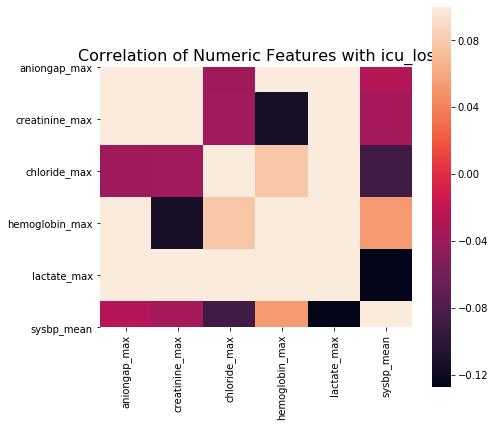

In [28]:
# 当然也可以直接看图
data_numeric = data[['aniongap_max', 'creatinine_max', 'chloride_max', 'hemoglobin_max', 
                     'lactate_max', 'sysbp_mean']]
correlation = data_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with icu_los',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.10)

### 包裹式

In [29]:
# k_feature 太大会很难跑，没服务器，所以提前 interrupt 了
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=10,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
x = data.drop(['icu_los'], axis=1)
x = x.fillna(0)
y = data['icu_los']
sfs.fit(x, y)
sfs.k_feature_names_ 

('age',
 'weight',
 'hematocrit_max',
 'ptt_max',
 'bun_min',
 'meanbp_max',
 'resprate_mean',
 'tempc_min',
 'tempc_max',
 'spo2_mean')

C:\Users\58297\.conda\envs\tf2.0\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\58297\.conda\envs\tf2.0\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


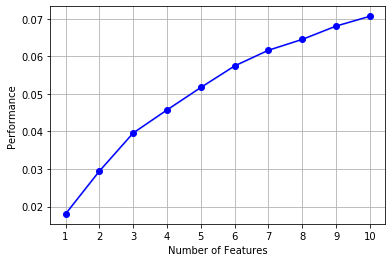

In [30]:
# 画出来，可以看到边际效益
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.grid()
plt.show()

### 嵌入式
* 下一次打卡

# 经验总结

* 特征构造也属于特征工程的一部分，其目的是为了增强数据的表达
* 匿名特征，这导致我们并不清楚特征相互直接的关联性，这时我们就只有单纯基于特征进行处理，比如装箱，groupby，agg 等这样一些操作进行一些特征统计，此外还可以对特征进行进一步的 log，exp 等变换，或者对多个特征进行四则运算（如上面我们算出的使用时长），多项式组合等然后进行筛选。由于特性的匿名性其实限制了很多对于特征的处理，当然有些时候用 NN 去提取一些特征也会达到意想不到的良好效果。
* 对于知道特征含义（非匿名）的特征工程，特别是在工业类型比赛中，会基于信号处理，频域提取，丰度，偏度等构建更为有实际意义的特征，这就是结合背景的特征构建，在推荐系统中也是这样的，各种类型点击率统计，各时段统计，加用户属性的统计等等，这样一种特征构建往往要深入分析背后的业务逻辑或者说物理原理，从而才能更好的找到 magic。
* 特征工程的主要目的还是在于将数据转换为能更好地表示潜在问题的特征，从而提高机器学习的性能。
* 异常值处理是为了去除噪声；填补缺失值可以加入先验知识等；

** 上面都是阿泽老师总结好了的知识，自己以前在简单的机器学习建模中只运用简单的处理缺失值、归一化和onehot，还有很多特征工程的技术还需要学习。群里面的老师同学们还分享了两本电子版的特征工程书，非常感谢大家的无私指导。